In [1]:
import pandas as pd
import numpy as np

In [2]:
cs=pd.read_csv('wisc_bc_data-1.csv')
cs.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
cs.drop('id',axis=1,inplace=True)

In [5]:
cs

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [6]:
cs['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
x=cs.drop('diagnosis',axis=1)
y=cs.diagnosis

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2406)

In [13]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [14]:
pred_dt=dt.predict(xtest)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(ytest,pred_dt)

0.956140350877193

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [20]:
sca=ss.fit_transform(x)

In [22]:
new=pd.DataFrame(sca,columns=x.columns)

In [23]:
new

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,...,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,...,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,...,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,...,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


# PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
new_cov=new.cov()
new_cov

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness_mean,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity_mean,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
points_mean,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry_mean,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,...,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
dimension_mean,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,...,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


In [27]:
eigval,eigvect=np.linalg.eig(new_cov)

In [28]:
eigval

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [29]:
s=sum(eigval)
s

30.052816901408455

In [31]:
var_exp=[((x/s)*100) for x in sorted(eigval,reverse=True)]
var_exp

[44.27202560752632,
 18.971182044033082,
 9.393163257431388,
 6.602134915470158,
 5.49576849234628,
 4.024522039883355,
 2.250733712982512,
 1.5887238000213257,
 1.3896493745591085,
 1.1689781894131488,
 0.9797189875980195,
 0.8705379007378808,
 0.8045249871967318,
 0.5233657454926364,
 0.3137832167627406,
 0.2662093365152314,
 0.19799679253242716,
 0.17539594502263686,
 0.16492530592251695,
 0.10386467483387064,
 0.09990964637002439,
 0.0914646751054349,
 0.08113612588991137,
 0.060183356667167176,
 0.05160423791651886,
 0.027258799547749884,
 0.023001546250596222,
 0.005297792903810112,
 0.0024960103246885173,
 0.0004434827427377241]

In [32]:
cum_var_exp=np.cumsum(var_exp)
cum_var_exp

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [34]:
len(cum_var_exp)

30

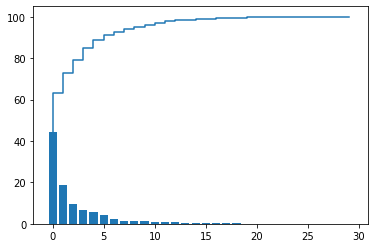

In [35]:
import matplotlib.pyplot as plt
plt.bar(range(30),var_exp)
plt.step(range(30),cum_var_exp)
plt.show()

In [49]:
cum_var_exp[cum_var_exp<99.11]

array([44.27202561, 63.24320765, 72.63637091, 79.23850582, 84.73427432,
       88.75879636, 91.00953007, 92.59825387, 93.98790324, 95.15688143,
       96.13660042, 97.00713832, 97.81166331, 98.33502905, 98.64881227,
       98.91502161])

In [37]:
pca=PCA()

In [45]:
pca1=pca.fit_transform(new)


In [39]:
pca1_df=pd.DataFrame(pca1)
pca1_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,...,0.009094,0.040894,0.066805,-0.090082,0.049113,0.005853,-0.054270,0.015206,-0.016284,0.001426
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,...,-0.062215,-0.071435,-0.030817,0.016752,0.041730,0.060027,0.187019,0.027035,0.000798,0.008104
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,...,-0.107725,-0.054075,0.083732,-0.037002,-0.041956,0.036227,0.076746,-0.014655,-0.010250,0.009075
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,...,0.280626,-0.184839,0.214584,0.119792,-0.037641,0.149714,0.017530,-0.047878,-0.023600,0.000234
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,...,0.059379,-0.044543,0.007096,-0.002554,0.059813,-0.046141,-0.038144,0.032478,0.002370,-0.002571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.757430,-1.793919,-0.757814,0.024118,1.283912,-0.658833,-0.313234,0.595483,0.256924,-0.160192,...,0.156714,-0.039324,-0.069578,0.030269,0.096552,-0.084707,-0.015972,0.028268,-0.009522,-0.000093
565,-2.431551,3.447204,3.456945,0.493660,-1.045757,-1.008840,-0.375565,0.933897,-1.950921,-0.649771,...,0.008262,0.063588,0.048830,0.060442,-0.139060,-0.046946,-0.006568,-0.017530,0.000358,0.005821
566,-0.390019,-0.989242,-2.585169,-0.784527,0.734311,0.183738,0.691582,0.214829,-0.096870,0.460944,...,0.141950,0.195966,-0.081384,0.105814,-0.116001,0.056696,-0.047051,0.050835,-0.001109,0.003414
567,-1.173831,-0.474840,-0.481571,2.143959,-0.243301,-0.482860,-0.507511,-0.405135,-0.553780,-0.173562,...,-0.021076,-0.200501,0.003447,-0.128076,-0.016033,0.060623,-0.148027,0.001380,0.001949,-0.011327


In [47]:
(pca.explained_variance_ratio_)

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

### Building model using 16 component

In [75]:
p16=PCA(n_components=16)

In [76]:
p16_df=p16.fit_transform(new)

In [77]:
xtrain16,xtest16,ytrain16,ytest16=train_test_split(p16_df,y,test_size=0.2,random_state=100)

In [78]:
dt=DecisionTreeClassifier()
dt.fit(xtrain16,ytrain16)

DecisionTreeClassifier()

In [79]:
pred_p16=dt.predict(xtest16)

In [80]:
accuracy_score(pred_p16,ytest16)

0.9210526315789473

# Unsupervised learning

In [82]:
p16_df.shape

(569, 16)

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.cluster import KMeans

In [89]:
err=[]
for x in range(1,20):
    km=KMeans(n_clusters=x)
    km.fit(p16_df)
    err.append(km.inertia_)

In [90]:
err

[16884.794188417407,
 11410.856264086586,
 9877.600292497518,
 9075.496905887645,
 8373.88403019266,
 7791.0601079988055,
 7364.336344231615,
 7023.6843010004395,
 6722.346465172801,
 6457.4739545402745,
 6253.392531142764,
 6087.746823349183,
 5899.686648376626,
 5730.801426351718,
 5641.970838594377,
 5432.071971058381,
 5365.12768597546,
 5223.451063297672,
 5158.088047242705]

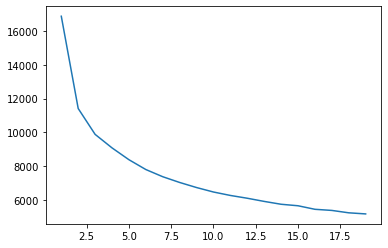

In [91]:
plt.plot(range(1,20),err)

In [94]:
km10=KMeans(n_clusters=2)
km10.fit(p16_df)

KMeans(n_clusters=2)

In [96]:
pred_2=km10.predict(xtest16)

In [102]:
pred_2.shape

(114,)

In [107]:
p16_df.shape

(569, 16)

In [113]:
km10.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [97]:
from sklearn.metrics import silhouette_score

In [100]:
for x in range(2,20):
    km=KMeans(n_clusters=x)
    km.fit(p16_df)
    print(x,silhouette_score(p16_df,km.labels_))

2 0.347597901601556
3 0.31692264136581233
4 0.2823000815423181
5 0.16167334675287934
6 0.16477171689497774
7 0.15550841397020454
8 0.1605341735702744
9 0.14577951883180618
10 0.124048723180767
11 0.1270711407349283
12 0.14137657256421612
13 0.12717237983453772
14 0.11912960190179259
15 0.11044046351556132
16 0.1207979216251187
17 0.11115390380569823
18 0.1215391556678448
19 0.12017762310215922


In [111]:
df_pcax=pd.DataFrame(p16_df,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',
                                    'pc11','pc12','pc13','pc14','pc15','pc16'])

In [112]:
df_pcax

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039178
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203306,-0.071753,-0.027068
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129667,0.242978
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194025,0.078396,-0.971456,-0.910703,-0.218713,0.666275,0.102271,0.101449
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005466,-0.064907,-0.222219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.757430,-1.793919,-0.757814,0.024118,1.283912,-0.658833,-0.313234,0.595483,0.256924,-0.160192,-0.197201,-0.398268,0.073266,-0.277151,0.077129,0.417710
565,-2.431551,3.447204,3.456945,0.493660,-1.045757,-1.008840,-0.375565,0.933897,-1.950921,-0.649771,0.307481,-0.923800,-0.341709,-0.083046,-0.214388,-0.057782
566,-0.390019,-0.989242,-2.585169,-0.784527,0.734311,0.183738,0.691582,0.214829,-0.096870,0.460944,-0.073577,0.411428,0.182555,-0.091698,-0.092878,-0.491924
567,-1.173831,-0.474840,-0.481571,2.143959,-0.243301,-0.482860,-0.507511,-0.405135,-0.553780,-0.173562,-0.331786,0.831554,-0.140296,0.066254,0.445665,0.044677


In [114]:
df_pcax['labels']=km10.labels_

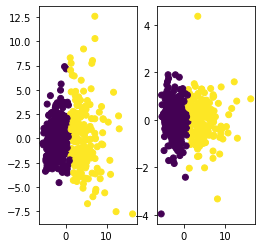

In [116]:
plt.subplot(1,3,1)
plt.scatter(df_pcax['pc1'],df_pcax['pc2'],c=df_pcax['labels'])

plt.subplot(1,3,2)
plt.scatter(df_pcax['pc1'],df_pcax['pc8'],c=df_pcax['labels'])

plt.show()

# LDA

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

(455, 30)

In [118]:
lda=LDA()

In [120]:
mylda=lda.fit_transform(xtrain,ytrain)

In [121]:
lda.explained_variance_ratio_

array([1.])

In [124]:
mylda.shape

(455, 1)

In [125]:
y.shape

(569,)

In [126]:
new.shape

(569, 30)

# Decision tree on lda transformed data

In [128]:
xtrain_lda,xtest_lda,ytrain_lda,ytest_lda=train_test_split(new,y,test_size=0.2,random_state=123)